In [14]:
import pickle
import hdbscan
import numpy as np
import pandas as pd
import scienceplots
import seaborn as sns
import matplotlib.pyplot as plt
from openTSNE import TSNE
plt.style.use(['science','no-latex'])
plt.rcParams["figure.figsize"] = (5, 5)

In [3]:
# load cluster embeddings
modelling_tsne_data_sentences = np.load('sentence_tsne_dimred_embeddings.npy')
modelling_tsne_data_sentences100 = np.load('sentence100_tsne_dimred_embeddings.npy')
modelling_tsne_data_words = np.load('word_tsne_dimred_embeddings.npy')

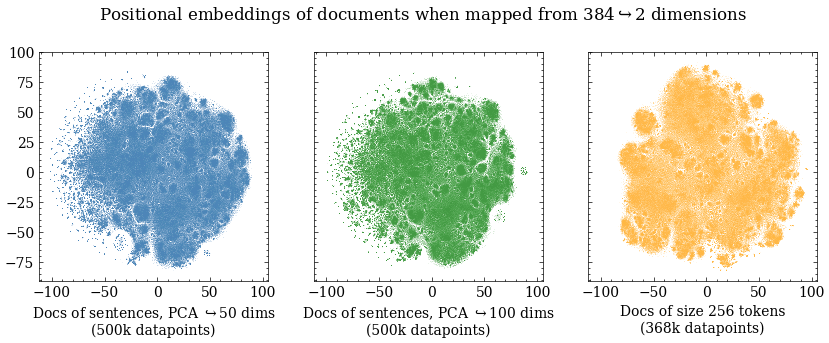

In [4]:
fig, axs = plt.subplots(1,3, figsize=(8.5,3.5), sharex=True, sharey=True)
fig.tight_layout()

plt.suptitle('Positional embeddings of documents when mapped from $384 \hookrightarrow 2$ dimensions')

sns.scatterplot(x = modelling_tsne_data_sentences[:,0], y=modelling_tsne_data_sentences[:,1], legend=False, s=0.05, ax=axs[0])
sns.scatterplot(x = modelling_tsne_data_sentences100[:,0], y=modelling_tsne_data_sentences100[:,1], legend=False, s=0.05, ax=axs[1], color='green')
sns.scatterplot(x = modelling_tsne_data_words[:,0], y=modelling_tsne_data_words[:,1], legend=False, s=0.05, ax=axs[2], color='orange')
axs[0].set_box_aspect(1)
axs[1].set_box_aspect(1)
axs[2].set_box_aspect(1)
axs[0].set_xlabel("Docs of sentences, PCA $\hookrightarrow 50$ dims\n(500k datapoints)")
axs[1].set_xlabel("Docs of sentences, PCA $\hookrightarrow 100$ dims\n(500k datapoints)")
axs[2].set_xlabel("Docs of size 256 tokens\n(368k datapoints)")

plt.show()

In [35]:
# Plot scatters with hdbscan hue
with open('hdbscan_model.pkl', 'rb') as inp:
    hdbscan_model = pickle.load(inp)
len(hdbscan_model.labels_)

368835

In [36]:
# Plot scatters with hdbscan hue
with open('prediction_hdbscan_model.pkl', 'rb') as inp:
    long_hdbscan_model = pickle.load(inp)
len(long_hdbscan_model.labels_)

500000

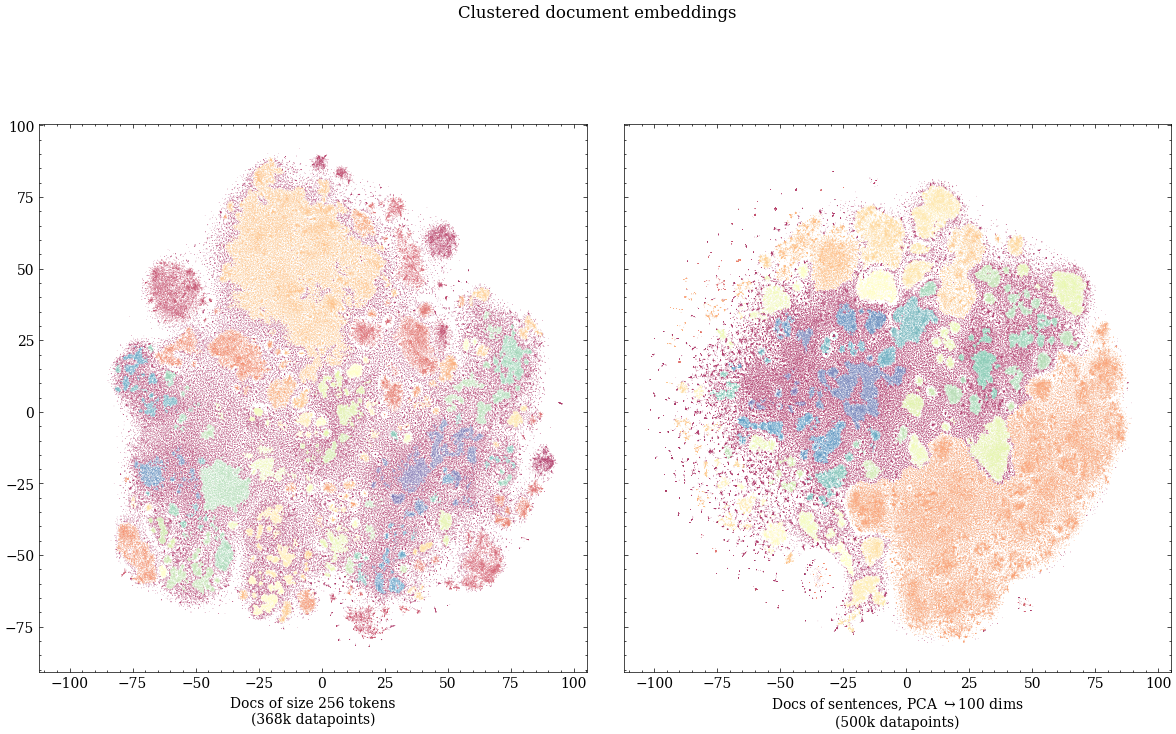

In [42]:
fig, axs = plt.subplots(1,2, figsize=(12, 8), sharex=True, sharey=True)
plt.suptitle('Clustered document embeddings')
fig.tight_layout()

sns.scatterplot(x = modelling_tsne_data_words[:,0], y=modelling_tsne_data_words[:,1],\
                 hue=hdbscan_model.labels_, legend=False, s=0.1, palette='Spectral', ax=axs[0])
sns.scatterplot(x = modelling_tsne_data_sentences[:,0], y=modelling_tsne_data_sentences[:,1],\
                 hue=long_hdbscan_model.labels_, legend=False, s=0.1, palette='Spectral', ax=axs[1])
axs[0].set_box_aspect(1)
axs[1].set_box_aspect(1)
axs[0].set_xlabel("Docs of size 256 tokens\n(368k datapoints)")
axs[1].set_xlabel("Docs of sentences, PCA $\hookrightarrow 100$ dims\n(500k datapoints)")
plt.show()